In [1]:
import pandas as pd

#carga y limpieza de datos

#cargaremos y exploraremos los datos
df = pd.read_csv('cardio.csv')
print(df.head())

#veremos la informacion de los datos y corroborar si hay nulos
print(df.info())

#estadistica descriptiva rapida
print(df.describe())

#contaremos los valores 
print(df.nunique())

#verificamos los datos nulos por columna
print(df.isnull().sum())

#eliminamos las filas con valores nulos
df = df.dropna()

#volvemos a revisar si hay nulos
print(df.isnull().sum())


  sex  age  education currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0   M   39        4.0            No         0.0     0.0                0   
1   F   46        2.0            No         0.0     0.0                0   
2   M   48        1.0           Yes        20.0     0.0                0   
3   F   61        3.0           Yes        30.0     0.0                0   
4   F   46        3.0           Yes        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3   

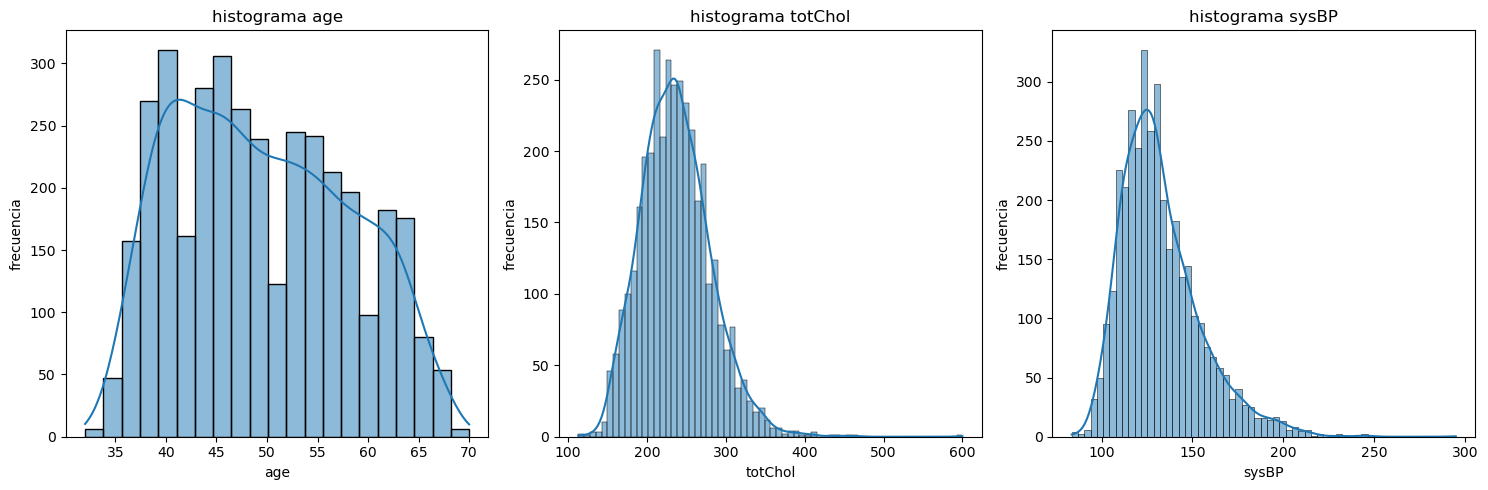

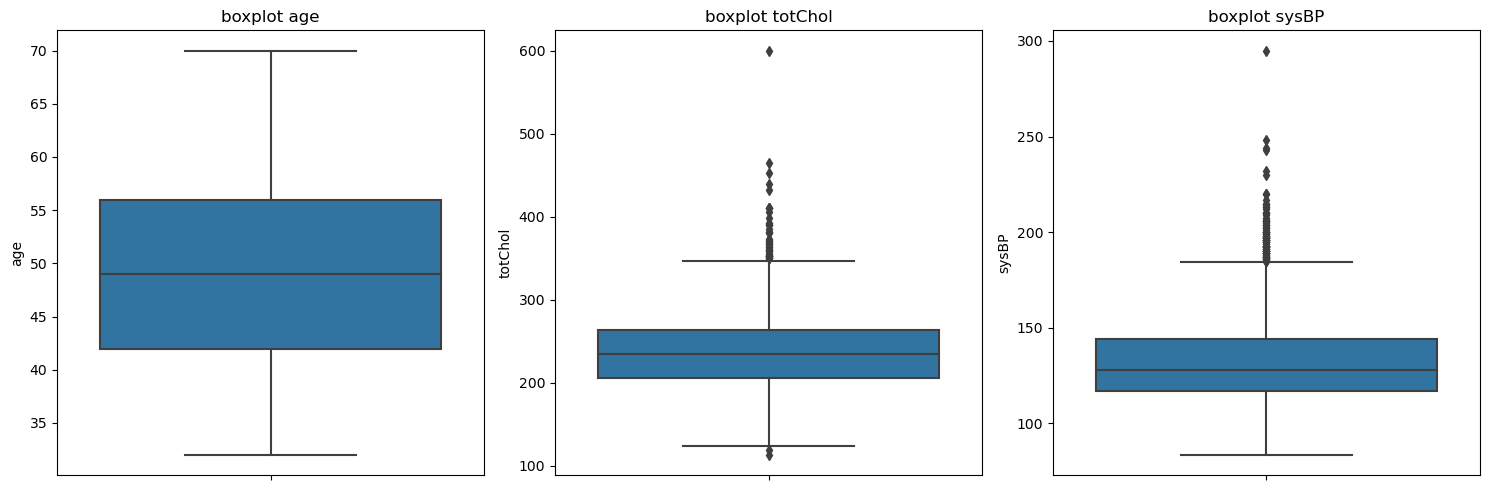

indicadores estadisticos:
               age      totChol        sysBP
count  3656.000000  3656.000000  3656.000000
mean     49.557440   236.873085   132.368025
std       8.561133    44.096223    22.092444
min      32.000000   113.000000    83.500000
25%      42.000000   206.000000   117.000000
50%      49.000000   234.000000   128.000000
75%      56.000000   263.250000   144.000000
max      70.000000   600.000000   295.000000

coef de variacion:
age        0.17
totChol    0.19
sysBP      0.17
dtype: float64


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#seleccionamos las variables
variables = ['age', 'totChol', 'sysBP']

# Calcular indicadores estadísticos
stats = df[variables].describe()

#calculamos coef de variacion para cada variable
coef_var = df[variables].std() / df[variables].mean()

#creamos histogramas para cada variable
plt.figure(figsize=(15, 5))
for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[var], kde=True)
    plt.title(f'histograma {var}')
    plt.xlabel(var)
    plt.ylabel('frecuencia')

plt.tight_layout()
plt.show()

# Generar boxplots para cada variable
plt.figure(figsize=(15, 5))
for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[var])
    plt.title(f'boxplot {var}')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

#mostramos los indicadores estadisticos
print("indicadores estadisticos:")
print(stats)

#por ultimo mostramos los coef de variacion
print("\ncoef de variacion:")
print(coef_var.round(2))


In [6]:
#calculamos los rangos
Q1 = df[variables].quantile(0.25)
Q3 = df[variables].quantile(0.75)
IQR = Q3 - Q1

#definimos los limites lower y upper de IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#eliminamos las filas con las variables atipicas aun que sea 1
df_clean = df[~((df[variables] < lower_bound) | (df[variables] > upper_bound)).any(axis=1)]

#hacemos la diferencia entre los datos atipicos
print("tamaño antes de eliminar los datos atipicos", df.shape)
print("tamaño despues de eliminar los datos atipicos", df_clean.shape)


tamaño antes de eliminar los datos atipicos (3656, 16)
tamaño despues de eliminar los datos atipicos (3505, 16)


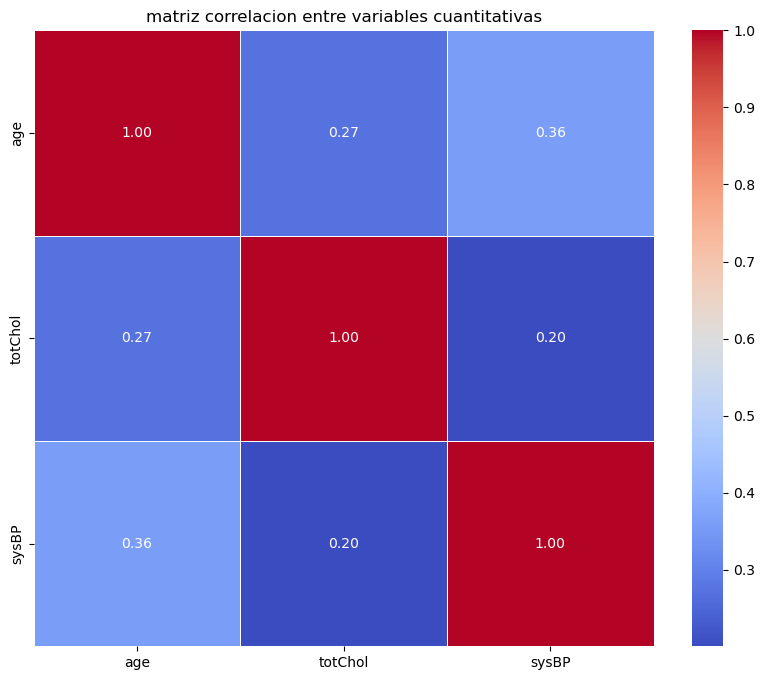

In [8]:
#calculamos la matriz de correlacion
corr_matrix = df_clean[variables].corr()

#mostramos la matriz de correlacion con mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("matriz correlacion entre variables cuantitativas")
plt.show()


In [11]:
#encontrar el limite superior del mayor cuartil de la variable imc
q3_imc = df_clean['BMI'].quantile(0.75)
upper_limit_imc = q3_imc

#filtrar pacientes cuyo imc está por encima del límite superior
pacientes_filtrados = df_clean[df_clean['BMI'] > upper_limit_imc]

#calculamos la probabilidad de que un paciente elegido al azar sea hombre
total_pacientes = len(pacientes_filtrados)
pacientes_hombres = len(pacientes_filtrados[pacientes_filtrados['sex'] == 'M'])

probabilidad_hombres_imc_alto = pacientes_hombres / total_pacientes

print("La probabilidad de que un paciente elegido al azar sea hombre, dado que pertenece al mayor cuartil de BMI, es:", probabilidad_hombres_imc_alto )


La probabilidad de que un paciente elegido al azar sea hombre, dado que pertenece al mayor cuartil de BMI, es: 0.5120274914089347


In [15]:
#filtramos los datos para seleccionar solo fumadores
pacientes_fumadores = df_clean[df_clean['currentSmoker'] == 'Yes']

#serapamos los grupos en hombres fumadores y mujeres fumadoras
hombres_fumadores = pacientes_fumadores[pacientes_fumadores['sex'] == 'M']
mujeres_fumadoras = pacientes_fumadores[pacientes_fumadores['sex'] == 'F']

#calculamos el promedio por cada grupo
promedio_hombres = hombres_fumadores['cigsPerDay'].mean()
promedio_mujeres = mujeres_fumadoras['cigsPerDay'].mean()

#mostramos los promedios
print("promedio de cigarrillos consumidos por dia para hombres fumadores:", promedio_hombres.round(1))
print("promedio de cigarrillos consumidos por dia para mujeres fumadoras:", promedio_mujeres.round(1))


promedio de cigarrillos consumidos por dia para hombres fumadores: 22.3
promedio de cigarrillos consumidos por dia para mujeres fumadoras: 13.8


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

#seleccionamos las variables
variables = ['age', 'education', 'currentSmoker', 'cigsPerDay', 'prevalentStroke', 'sysBP']

#separamos los datos en caracteristicas (X) y variable objetivo (y)
X = df_clean[variables]
y = df_clean['BMI']

#codificamos la variable cualitativa
encoder = LabelEncoder()
X['currentSmoker'] = encoder.fit_transform(X['currentSmoker'])

#separamos los datos en conjunto de entrenamiento y conjunto de prueba fit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#ajustamos el modelo de regresion lineal
model = LinearRegression()
model.fit(X_train, y_train)

#realizamos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

#evaluamos el nuevo modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("coef de determinación (R cuadrado):", r2.round(2))
print("error cuadratico medio (MSE):", mse.round(2))


coef de determinación (R cuadrado): 0.12
error cuadratico medio (MSE): 13.87


C:\Users\FpymeTarapaca\AppData\Local\Temp\ipykernel_10484\3694492479.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['currentSmoker'] = encoder.fit_transform(X['currentSmoker'])


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

#seleccionamos las variables
variables_regresion_logistica = ['age', 'education', 'currentSmoker', 'cigsPerDay', 
                                 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 
                                 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'sex']

#separamos los datos en caracteristicas (X) y variable objetivo (y)
X = df_clean[variables_regresion_logistica]
y = df_clean['TenYearCHD']

#codificamos la variable categórica 'sex' con etiquetas numericas ya que son tipo char
sexo_codificado = LabelEncoder()
X['sex'] = sexo_codificado.fit_transform(X['sex'])

#codificamos la variable 'currentSmoker' con etiquetas numericas ya que son char(yes no)
fumador_codificador = LabelEncoder()
X['currentSmoker'] = fumador_codificador.fit_transform(X['currentSmoker'])

#separamos los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#ajustamos el modelo de regresión logistica
model = LogisticRegression()
model.fit(X_train, y_train)

#realizamos las predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("precision:", accuracy)
print("informe:")
print(report)
print("matriz de confusion:")
print(confusion)




precision: 0.8616262482168331
informe:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       605
           1       0.00      0.00      0.00        96

    accuracy                           0.86       701
   macro avg       0.43      0.50      0.46       701
weighted avg       0.74      0.86      0.80       701

matriz de confusion:
[[604   1]
 [ 96   0]]


C:\Users\FpymeTarapaca\AppData\Local\Temp\ipykernel_10484\3791737339.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = sexo_codificado.fit_transform(X['sex'])
C:\Users\FpymeTarapaca\AppData\Local\Temp\ipykernel_10484\3791737339.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['currentSmoker'] = fumador_codificador.fit_transform(X['currentSmoker'])
C:\Users\FpymeTarapaca\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status